# Prediction of health insurance amount

In [3]:
#Import libraries
import pandas as pd
import pandas_profiling as pp
import numpy as np
import seaborn as sns
import matplotlib.pyplot as mp

In [4]:
#Read dataset
heart = pd.read_csv(r"..\Dataset\heart.csv")
diab = pd.read_csv(r"..\Dataset\diabetes.csv")
cancer = pd.read_csv(r"..\Dataset\cancer.csv")

Three most expensive diseases in the world according to National Association for Biomedical Research :
1. Heart disease
2. Diabetes 
3. Cancer 

## Analysis of Disease Indicators
We will analyse each dataset of the diseases such as heart disease, diabetes and cancer to find risk factors of the particular disease. We will then apply intersection between three sets for feature selection.

### Analysis of Heart Disease Indicators dataset

In [5]:
#view dataset
heart.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HealthyEatingHabits,HvyAlcoholConsump,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,9,4,3
1,0,0,0,0,25,1,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,1,0,0,9,4,8
3,0,1,0,1,27,0,0,1,0,0,11,3,6
4,0,1,1,1,24,0,0,1,0,0,11,5,4
5,0,1,1,1,25,1,0,1,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,9,6,7
7,0,1,1,1,25,1,0,0,0,0,11,4,4
8,1,1,1,1,30,1,0,1,0,0,9,5,1
9,0,0,0,1,24,0,0,0,0,1,8,4,3


In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HeartDiseaseorAttack  253680 non-null  int64
 1   HighBP                253680 non-null  int64
 2   HighChol              253680 non-null  int64
 3   CholCheck             253680 non-null  int64
 4   BMI                   253680 non-null  int64
 5   Smoker                253680 non-null  int64
 6   Stroke                253680 non-null  int64
 7   HealthyEatingHabits   253680 non-null  int64
 8   HvyAlcoholConsump     253680 non-null  int64
 9   Sex                   253680 non-null  int64
 10  Age                   253680 non-null  int64
 11  Education             253680 non-null  int64
 12  Income                253680 non-null  int64
dtypes: int64(13)
memory usage: 25.2 MB


In [7]:
df = heart.copy()

In [8]:
importances = df.drop("HeartDiseaseorAttack", axis=1).apply(lambda x: x.corr(df.HeartDiseaseorAttack))
indices = np.argsort(importances)
print(importances[indices])

Income                -0.141011
Education             -0.099600
HvyAlcoholConsump     -0.028991
HealthyEatingHabits   -0.019790
CholCheck              0.044206
BMI                    0.052904
Sex                    0.086096
Smoker                 0.114441
HighChol               0.180765
Stroke                 0.203002
HighBP                 0.209361
Age                    0.221618
dtype: float64


In [9]:
def find_correlations(X):
    for i in range(0,len(X.columns)):
        for j in  range(0,len(X.columns)):
            if i!=j:
                corr_1=np.abs(X[X.columns[i]].corr(X[X.columns[j]]))
                if corr_1 <0.2:
                    print( X.columns[i] , " is not correlated  with ", X.columns[j])
                elif corr_1>=0.2:
                    print( X.columns[i] , " is correlated  with ", X.columns[j])
                

In [10]:
#Finding independant features
X= df[['Age','HighBP','Stroke','HighChol','Smoker','Sex','BMI','CholCheck']]
find_correlations(X)

Age  is correlated  with  HighBP
Age  is not correlated  with  Stroke
Age  is correlated  with  HighChol
Age  is not correlated  with  Smoker
Age  is not correlated  with  Sex
Age  is not correlated  with  BMI
Age  is not correlated  with  CholCheck
HighBP  is correlated  with  Age
HighBP  is not correlated  with  Stroke
HighBP  is correlated  with  HighChol
HighBP  is not correlated  with  Smoker
HighBP  is not correlated  with  Sex
HighBP  is correlated  with  BMI
HighBP  is not correlated  with  CholCheck
Stroke  is not correlated  with  Age
Stroke  is not correlated  with  HighBP
Stroke  is not correlated  with  HighChol
Stroke  is not correlated  with  Smoker
Stroke  is not correlated  with  Sex
Stroke  is not correlated  with  BMI
Stroke  is not correlated  with  CholCheck
HighChol  is correlated  with  Age
HighChol  is correlated  with  HighBP
HighChol  is not correlated  with  Stroke
HighChol  is not correlated  with  Smoker
HighChol  is not correlated  with  Sex
HighChol  is n

Selected features : Age, Stroke, Smoker, Sex and BMI.

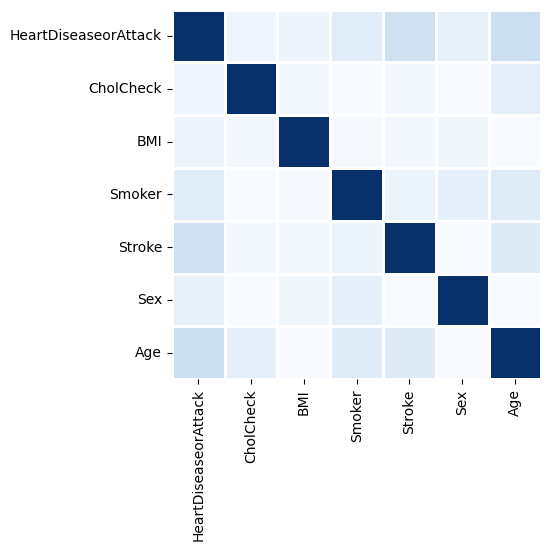

In [11]:
data = heart[["HeartDiseaseorAttack","CholCheck","BMI","Smoker","Stroke","Sex","Age"]]
corr = data.corr()

ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
mp.show()

In [14]:
#Report
report1 = pp.ProfileReport(df)

#Save the report in HTML format.
report1.to_file("..\Report\Heart.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
Summarize dataset:  68%|██████▊   | 17/25 [00:34<00:11,  1.50s/it, Calculate kendall correlation]        c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 31.22it/s]


### Analysis of Diabetes Indicators dataset

In [15]:
#Read dataset
diab.head(10)

,diabetes,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HealthyEatingHabits,HvyAlcoholConsump,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,9,4,3
1,0,0,0,0,25,1,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,1,0,0,9,4,8
3,0,1,0,1,27,0,0,1,0,0,11,3,6
4,0,1,1,1,24,0,0,1,0,0,11,5,4
5,0,1,1,1,25,1,0,1,0,1,10,6,8
6,0,1,0,1,30,1,0,0,0,0,9,6,7
7,0,1,1,1,25,1,0,0,0,0,11,4,4
8,2,1,1,1,30,1,0,1,0,0,9,5,1
9,0,0,0,1,24,0,0,0,0,1,8,4,3


In [16]:
diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype
---  ------               --------------   -----
 0   diabetes             253680 non-null  int64
 1   HighBP               253680 non-null  int64
 2   HighChol             253680 non-null  int64
 3   CholCheck            253680 non-null  int64
 4   BMI                  253680 non-null  int64
 5   Smoker               253680 non-null  int64
 6   Stroke               253680 non-null  int64
 7   HealthyEatingHabits  253680 non-null  int64
 8   HvyAlcoholConsump    253680 non-null  int64
 9   Sex                  253680 non-null  int64
 10  Age                  253680 non-null  int64
 11  Education            253680 non-null  int64
 12  Income               253680 non-null  int64
dtypes: int64(13)
memory usage: 25.2 MB


In [17]:
df1 = diab.copy()

In [18]:
importances = df1.drop("diabetes", axis=1).apply(lambda x: x.corr(diab.diabetes))
indices = np.argsort(importances)
print(importances[indices])

Income                -0.171483
Education             -0.130517
HvyAlcoholConsump     -0.057882
HealthyEatingHabits   -0.042192
Sex                    0.031040
Smoker                 0.062914
CholCheck              0.067546
Stroke                 0.107179
Age                    0.185026
HighChol               0.209085
BMI                    0.224379
HighBP                 0.271596
dtype: float64


In [19]:
df2 = df1[["HighBP","BMI","HighChol","Age","Stroke","CholCheck","Smoker","Sex"]]
find_correlations(df2)

HighBP  is correlated  with  BMI
HighBP  is correlated  with  HighChol
HighBP  is correlated  with  Age
HighBP  is not correlated  with  Stroke
HighBP  is not correlated  with  CholCheck
HighBP  is not correlated  with  Smoker
HighBP  is not correlated  with  Sex
BMI  is correlated  with  HighBP
BMI  is not correlated  with  HighChol
BMI  is not correlated  with  Age
BMI  is not correlated  with  Stroke
BMI  is not correlated  with  CholCheck
BMI  is not correlated  with  Smoker
BMI  is not correlated  with  Sex
HighChol  is correlated  with  HighBP
HighChol  is not correlated  with  BMI
HighChol  is correlated  with  Age
HighChol  is not correlated  with  Stroke
HighChol  is not correlated  with  CholCheck
HighChol  is not correlated  with  Smoker
HighChol  is not correlated  with  Sex
Age  is correlated  with  HighBP
Age  is not correlated  with  BMI
Age  is correlated  with  HighChol
Age  is not correlated  with  Stroke
Age  is not correlated  with  CholCheck
Age  is not correlated 

Selected features : BMI, Age, Stroke, Cholcheck, Smoker, Sex

In [20]:
data = df1[["diabetes","BMI","Age","Stroke","CholCheck","Smoker","Sex"]]
corr = data.corr()

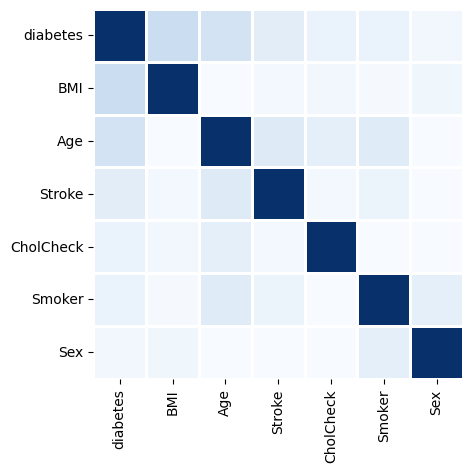

In [21]:
ax1 = sns.heatmap(corr, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues')
mp.show()

In [22]:
#Report
report1 = pp.ProfileReport(df1)

#Save the report in HTML format.
report1.to_file("..\Report\Diabetes.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\multimethod\__init__.py:315: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  return func(*args, **kwargs)
Summarize dataset:  68%|██████▊   | 17/25 [00:53<00:16,  2.01s/it, Calculate kendall correlation]       c:\Users\sneha\OneDrive\Desktop\Predict-health-insurance-amount\venv\lib\site-packages\scipy\stats\_stats_py.py:5218: RuntimeWarning: overflow encountered in longlong_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))
Export report to file: 100%|██████████| 1/1 [00:00<00:00, 50.34it/s]


### Analysis of Cancer Indicators dataset

In [23]:
cancer.head(10)

,Cancer,Region,MARITAL,EDUCA,Gender,Age,BMI,Children,Smoker
0,1.0,1,2.0,6.0,2,8,1.0,1,1
1,2.0,1,3.0,6.0,2,10,3.0,1,9
2,2.0,1,1.0,5.0,2,10,NaN,1,4
3,2.0,1,3.0,4.0,2,13,NaN,1,4
4,2.0,1,3.0,6.0,2,13,2.0,1,4
5,2.0,1,4.0,4.0,1,10,3.0,1,3
6,1.0,1,1.0,4.0,2,12,2.0,1,4
7,2.0,1,1.0,4.0,2,10,3.0,1,1
8,2.0,1,2.0,6.0,2,5,2.0,3,4
9,2.0,1,3.0,2.0,2,12,3.0,1,3


In [24]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401958 entries, 0 to 401957
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cancer    401955 non-null  float64
 1   Region    401958 non-null  int64  
 2   MARITAL   401946 non-null  float64
 3   EDUCA     401946 non-null  float64
 4   Gender    401958 non-null  int64  
 5   Age       401958 non-null  int64  
 6   BMI       360601 non-null  float64
 7   Children  401958 non-null  int64  
 8   Smoker    401958 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 27.6 MB


In [25]:
percent_missing = cancer.isnull().sum() * 100 / len(cancer)
missing_value_df = pd.DataFrame({'column_name': cancer.columns,
                                 'percent_missing': percent_missing})
missing_value_df

,column_name,percent_missing
Cancer,Cancer,0.000746
Region,Region,0.000000
MARITAL,MARITAL,0.002985
EDUCA,EDUCA,0.002985
Gender,Gender,0.000000
Age,Age,0.000000
BMI,BMI,10.288886
Children,Children,0.000000
Smoker,Smoker,0.000000


In [26]:
cancer1 = cancer.dropna()

In [27]:
cancer1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360601 entries, 0 to 401957
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Cancer    360601 non-null  float64
 1   Region    360601 non-null  int64  
 2   MARITAL   360601 non-null  float64
 3   EDUCA     360601 non-null  float64
 4   Gender    360601 non-null  int64  
 5   Age       360601 non-null  int64  
 6   BMI       360601 non-null  float64
 7   Children  360601 non-null  int64  
 8   Smoker    360601 non-null  int64  
dtypes: float64(4), int64(5)
memory usage: 27.5 MB


In [28]:
importances = cancer1.drop("Cancer", axis=1).apply(lambda x: x.corr(cancer1.Cancer))
indices = np.argsort(importances)
print(importances[indices])

Age        -0.164629
EDUCA      -0.031161
Smoker     -0.003633
Gender      0.002178
BMI         0.013979
Region      0.015616
MARITAL     0.066030
Children    0.071847
dtype: float64


In [29]:
df3= cancer1[["Children","MARITAL","Region","BMI","Gender"]]
find_correlations(df3)

Children  is not correlated  with  MARITAL
Children  is not correlated  with  Region
Children  is not correlated  with  BMI
Children  is not correlated  with  Gender
MARITAL  is not correlated  with  Children
MARITAL  is not correlated  with  Region
MARITAL  is not correlated  with  BMI
MARITAL  is not correlated  with  Gender
Region  is not correlated  with  Children
Region  is not correlated  with  MARITAL
Region  is not correlated  with  BMI
Region  is not correlated  with  Gender
BMI  is not correlated  with  Children
BMI  is not correlated  with  MARITAL
BMI  is not correlated  with  Region
BMI  is not correlated  with  Gender
Gender  is not correlated  with  Children
Gender  is not correlated  with  MARITAL
Gender  is not correlated  with  Region
Gender  is not correlated  with  BMI


Selected features : Children, MARITAL, Region, BMI, Gender